In [1]:
# Author: Volker Hoffmann, SINTEF Digital <volker.hoffmann@sintef.no>
# Update: 07 November 2017

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

There a few core packages that make Python such a great place for rapid experimentation on your datasets. These are -- in no particular order -- Matplotlib, Numpy, Scipy, Pandas, and Scikit-Learn.

Their respective (core) purposes are as follows:

|Name|Abbreviation|Description|Link|
|:---|:---|:---|:---|
|**Matplotlib**||Plotting library|https://matplotlib.org/|
|**Numpy**|*Numerical Python*|Fast array operations|http://www.numpy.org/|
|**Scipy**|*Scientific Python*|Functions for scientific computing|https://www.scipy.org/|
|**Pandas**|*Python Data Analysis Library*|Convenient ways of dealing with structured data|http://pandas.pydata.org/|
|**Scikit-Learn**||Statistical learning library|http://scikit-learn.org|

There are many more libraries in the Python universe -- some of them built on top of the above. Feel free to explore these at your own leisure.

# Numpy & Matplotlib

We start by demonstrating the most basic use for both Numpy and Matplotlib, i.e. defining two arrays of numerical data, adding them up element by element (which is a vectorized operation), and plotting all of them.

In [3]:
# This imports the packages we need
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# This makes sure figures appear in the notebook
%matplotlib inline

In [5]:
# This sets up two arrays x and y, and adds them up elementwise into z
x = np.arange(6)
y = np.array([1,1,2,3,3,4])
z = x + y
print 'x =', x
print 'y =', y
print 'z =', z

x = [0 1 2 3 4 5]
y = [1 1 2 3 3 4]
z = [1 2 4 6 7 9]


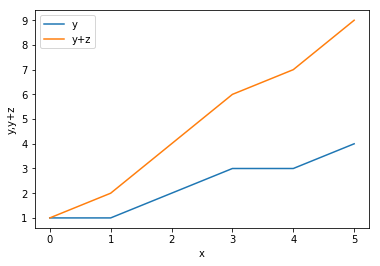

In [6]:
# This makes the plots 
fig, ax = plt.subplots(1,1)
ax.plot(x,y,label='y')
ax.plot(x,z,label='y+z')
ax.set_xlabel('x')
ax.set_ylabel('y,y+z')
ax.legend(loc='best')

# Pandas

In Pandas, a dataframe is the basic storage container for your data. We now show how to create dataframes, what they look like, how to get some quick statistics, how to filter, how to run some functions, and how to get data out again.

In [7]:
# Import Pandas
import pandas as pd

In [8]:
# Make a dataframe with two columns
df = pd.DataFrame( { 'column1': np.array([10,11,12,13,14,15]), \
                     'column2': np.array([20,21,22,23,24,25])})

In [9]:
# Let's have a look at this dataframe
df

,column1,column2
0,10,20
1,11,21
2,12,22
3,13,23
4,14,24
5,15,25


In [10]:
# Let's get some summary statistics
df.describe()

,column1,column2
count,6.000000,6.000000
mean,12.500000,22.500000
std,1.870829,1.870829
min,10.000000,20.000000
25%,11.250000,21.250000
50%,12.500000,22.500000
75%,13.750000,23.750000
max,15.000000,25.000000


So, the dataframe has two columns labelled 'column1' and 'column2'. The zero-th column is a running index of the dataframe. We can access particular columns or rows of the dataframe as follows.

In [11]:
# We can also do elemntwise addition of all columns and store the result in a new column
df['column3'] = df.column1 + df.column2
df

,column1,column2,column3
0,10,20,30
1,11,21,32
2,12,22,34
3,13,23,36
4,14,24,38
5,15,25,40


In [12]:
# Now, let's only keep rows where column3 has a value of at least 36
df = df[df.column3 >= 36]
df

,column1,column2,column3
3,13,23,36
4,14,24,38
5,15,25,40


# Scikit-Learn

In [13]:
# Generate data with some noise superimposed
# 
# The function np.random.randn(512) generates 512 samples from a normal distribution (mean=0, variance=1)
# Cf. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randn.html
# 
x = np.linspace(0.0, 8.0 * np.pi, 512)
y = np.sin(x) + (np.random.randn(512)/10.0)

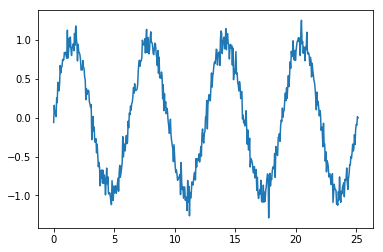

In [14]:
# Let's quickly plot the contents of our dataframe from above
fig, ax = plt.subplots(1,1)
ax.plot(x, y)
pass

In [15]:
# Let's try to do linear regression on this (haha...)

In [16]:
import sklearn.linear_model

In [17]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lr = sklearn.linear_model.LinearRegression()
lr.fit(x[:,np.newaxis], y[:,np.newaxis])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

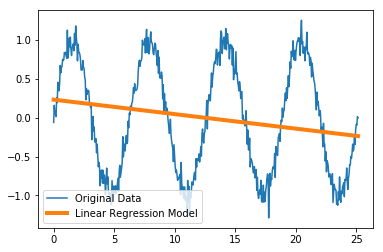

In [18]:
# Run the prediction
y_lr = lr.predict(x[:,np.newaxis])[:,0]

# Let's have a look
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label='Original Data')
ax.plot(x, y_lr, linewidth=4, label='Linear Regression Model')
ax.legend(loc='best')
pass

Obviously, fitting a line through a sine-wave is a pretty silly affair. Let's try a decision tree.

In [19]:
import sklearn.tree

In [20]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
dt = sklearn.tree.DecisionTreeRegressor(max_depth=6)
dt.fit(x[:,np.newaxis], y[:,np.newaxis])

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

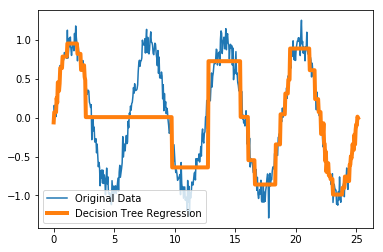

In [21]:
# Run the prediction
y_dt = dt.predict(x[:,np.newaxis])

# Let's have a look
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label='Original Data')
ax.plot(x, y_dt, linewidth=4, label='Decision Tree Regression')
ax.legend(loc='best')
pass

# SciPy

Trying linear regression or a non-parametric fit with a decision tree is a bit silly **if we know** that we're trying to fit a sine-wave.

So let's just do curve-fitting.

In [22]:
import scipy.optimize

In [23]:
# This is the functional form we're trying to estimate the coefficients for
def func(x, a, b, c):
    return a*np.sin(b*x)+c

# Do a least-squares fit
# Cf. https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.curve_fit.html
parameter_values, parameter_covariances = scipy.optimize.curve_fit(func, x, y)

# Show the estimated parameter values
print parameter_values

# Convenience
a = parameter_values[0]
b = parameter_values[1]
c = parameter_values[2]

[ 0.9850928   0.99964468 -0.00253031]


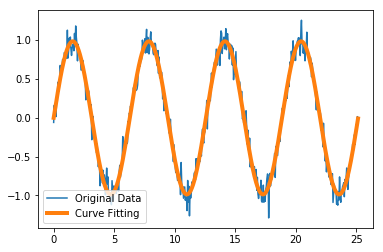

In [24]:
# Let's have a look
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label='Original Data')
ax.plot(x, func(x, a, b, c), linewidth=4, label='Curve Fitting')
ax.legend(loc='best')
pass

# Next Steps

In the next tutorials, we will dig a bit deeper into each of these packages. For example, we will show how to load CSV data into a dataframe, clean it up, use Numpy and Matplotlib to do histograms, and Scikit-Learn to do dimensionality reduction and classification.

If you want to dig a bit deeper into Pandas yourself, there's a nice tutorial here:

- http://pandas.pydata.org/pandas-docs/version/0.15/10min.html